# Breast Cancer
- ### 차원축소 : 2,5,10
- ### 분류 정확도 : 원본, 2, 5, 10
- ### 2차원 -> 시각화
- ### 군집화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
cancer = load_breast_cancer()
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
a = rfc.score(X_test, y_test)
a

0.965034965034965

- ### 차원 축소 : 2 , 분류 정확도

In [15]:
pca2 = PCA(n_components=2)
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca2[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify=cancer.target, random_state=2021
)

In [24]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train,y_train)
b = rfc2.score(X_test,y_test)
b

0.972027972027972

- ### 차원 축소 : 5 , 분류 정확도

In [6]:
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)
cancer_pca5[:5]

array([[ 9.19283683,  1.94858302, -1.12316658,  3.63372885, -1.1951126 ],
       [ 2.3878018 , -3.76817171, -0.52929238,  1.11826526,  0.62177685],
       [ 5.73389628, -1.07517381, -0.55174774,  0.91208217, -0.17708692],
       [ 7.1229532 , 10.27558912, -3.23278968,  0.1525469 , -2.96087943],
       [ 3.93530207, -1.94807155,  1.38976685,  2.94064003,  0.54674816]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify=cancer.target, random_state=2021
)

In [25]:
rfc5 = RandomForestClassifier()
rfc5.fit(X_train, y_train)
c = rfc5.score(X_test, y_test)
c

0.965034965034965

- ### 차원 축소 : 10, 분류 정확도

In [7]:
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)
cancer_pca10[:5]

array([[ 9.19283683,  1.94858307, -1.12316617,  3.63373094, -1.19511006,
         1.4114242 ,  2.15937031, -0.3984028 , -0.15707813, -0.87738677],
       [ 2.3878018 , -3.76817174, -0.52929268,  1.11826381,  0.62177491,
         0.02865663,  0.01335736,  0.24098452, -0.71194941,  1.10697886],
       [ 5.73389628, -1.0751738 , -0.55174758,  0.91208257, -0.17708605,
         0.54145263, -0.66816704,  0.09736138,  0.02398181,  0.45424792],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254702, -2.96087843,
         3.05342192,  1.42991051,  1.05956358, -1.40545583, -1.11698159],
       [ 3.93530207, -1.94807157,  1.38976672,  2.94063943,  0.54674753,
        -1.22649503, -0.93621195,  0.63638538, -0.26373812,  0.37772627]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify=cancer.target, random_state=2021
)

In [26]:
rfc10 = RandomForestClassifier()
rfc10.fit(X_train, y_train)
d = rfc10.score(X_test, y_test)
d

0.965034965034965

- ### 분류기 정확도

In [34]:
print(f'오리지널:\t{a}\n2차원:\t{b}\n5차원:\t{c}\n10차원:\t{d}')

오리지널:	0.965034965034965
2차원:	0.972027972027972
5차원:	0.965034965034965
10차원:	0.965034965034965


- ### 2차원 시각화

In [35]:
pca2 = PCA(n_components=2)
cancer_pca2 = pca2.fit_transform(cancer_std)
cancer_pca2[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify=cancer.target, random_state=2021
)

In [37]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train,y_train)
b = rfc2.score(X_test,y_test)
b

0.9370629370629371

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [54]:
kmeans.fit(cancer_std)

KMeans(n_clusters=3, random_state=2021)

In [55]:
kmeans.labels_

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [56]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['cluster'] = kmeans.labels_
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,2


In [57]:
df['PC1'] = cancer_pca2[:,0]
df['PC2'] = cancer_pca2[:,1]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,PC1,PC2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,2,9.192837,1.948583
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,2,2.387802,-3.768172
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,2,5.733896,-1.075174
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,7.122953,10.275589
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,2,3.935302,-1.948072


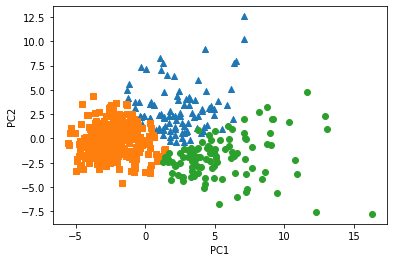

In [60]:
markers = ['^','s','o']   

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

- ### 실루엣 계수 확인

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(cancer_std, df.cluster)
df['실루엣 계수'] = score_samples
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,PC1,PC2,실루엣 계수
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,0,2,9.192837,1.948583,0.109598
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,0,2,2.387802,-3.768172,0.154567
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,0,2,5.733896,-1.075174,0.296081


In [62]:
df[['실루엣 계수']].mean()

실루엣 계수    0.314384
dtype: float64

In [63]:
silhouette_score(cancer_std, df.cluster)

0.3143840098608098

- 실루엣 계수의 시각화

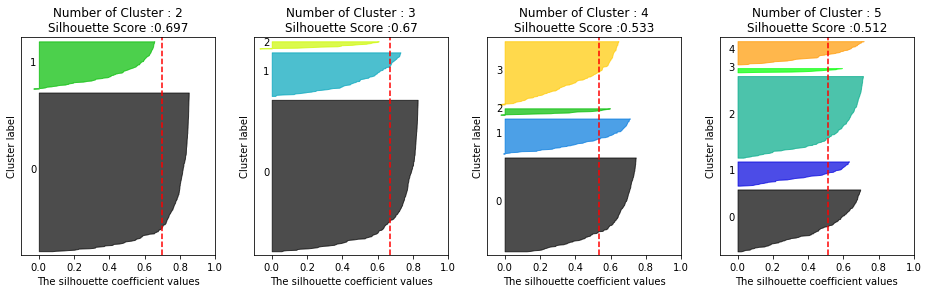

In [64]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], cancer.data)